# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [2]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-04-04 00:00:00
deaths    : last data point from 2020-04-04 00:00:00


2020-03-28 00:00:00  2020-03-29 00:00:00  2020-03-30 00:00:00  \
Country/Region                                                                  
Italy                         10023                10779                11591   
Spain                          5982                 6803                 7716   
US                             2026                 2467                 2978   
France                         2314                 2606                 3024   
United Kingdom                 1019                 1228                 1408   
Iran                           2517                 2640                 2757   
China                          3177                 3182                 3186   
Netherlands                     639                  771                  864   
Germany                         433                  533                  645   
Belgium                         353                  431                  513   

                2020-03-31 00:00:00  2020-04-01 00:00:00  2020-04-02 00:00:00  \
Country/Region                                                                  
Italy                         12428                13155                13915   
Spain                          8464                 9387                10348   
US                             3873                 4757                 5926   
France                         3523                 4032                 5387   
United Kingdom                 1789                 2352                 2921   
Iran                           2898                 3036                 3160   
China                          3187                 3193                 3199   
Netherlands                    1039                 1173                 1339   
Germany                         775                  920                 1107   
Belgium                         705                  828                 1011   

                2020-04-03 00:00:00  2020-04-04 00:00:00  
Country/Region                                            
Italy                         14681                15362  
Spain                         11198                11947  
US                             7087                 8407  
France                         6507                 7560  
United Kingdom                 3605                 4313  
Iran                           3294                 3452  
China                          3203                 3207  
Netherlands                    1487                 1651  
Germany                        1275                 1444  
Belgium                        1143                 1283

In [3]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-03-28 00:00:00  2020-03-29 00:00:00  2020-03-30 00:00:00  \
Country/Region                                                                  
Italy                         10023                10779                11591   
Spain                          5982                 6803                 7716   
US                             2026                 2467                 2978   
France                         2314                 2606                 3024   
United Kingdom                 1019                 1228                 1408   
...                             ...                  ...                  ...   
Fiji                              0                    0                    0   
Cambodia                          0                    0                    0   
Canada                            0                    0                    0   
Canada                            0                    0                    0   
United Kingdom                    0                    0                    0   

                2020-03-31 00:00:00  2020-04-01 00:00:00  2020-04-02 00:00:00  \
Country/Region                                                                  
Italy                         12428                13155                13915   
Spain                          8464                 9387                10348   
US                             3873                 4757                 5926   
France                         3523                 4032                 5387   
United Kingdom                 1789                 2352                 2921   
...                             ...                  ...                  ...   
Fiji                              0                    0                    0   
Cambodia                          0                    0                    0   
Canada                            0                    0                    0   
Canada                            0                    0                    0   
United Kingdom                    0                    0                    0   

                2020-04-03 00:00:00  2020-04-04 00:00:00  
Country/Region                                            
Italy                         14681                15362  
Spain                         11198                11947  
US                             7087                 8407  
France                         6507                 7560  
United Kingdom                 3605                 4313  
...                             ...                  ...  
Fiji                              0                    0  
Cambodia                          0                    0  
Canada                            0                    0  
Canada                            0                    0  
United Kingdom                    0                    0  

[259 rows x 8 columns]

In [4]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [5]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths days-td  days new_confirmed new_deaths  \
2020-01-28         4      0  0 days   0.0           NaN        NaN   
2020-01-29         4      0  1 days   1.0             0          0   
2020-01-30         4      0  2 days   2.0             0          0   
2020-01-31         5      0  3 days   3.0             1          0   
2020-02-01         8      0  4 days   4.0             3          0   
...              ...    ...     ...   ...           ...        ...   
2020-03-31     71808    775 63 days  63.0          4923        130   
2020-04-01     77872    920 64 days  64.0          6064        145   
2020-04-02     84794   1107 65 days  65.0          6922        187   
2020-04-03     91159   1275 66 days  66.0          6365        168   
2020-04-04     96092   1444 67 days  67.0          4933        169   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-03-31       1.073604    1.201550            3.775050   
2020-04-01       1.084447    1.187097            4.041424   
2020-04-02       1.088889    1.203261            3.746027   
2020-04-03       1.075064    1.151762            4.905760   
2020-04-04       1.054114    1.132549            5.568751   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-03-31               9.759727            0.183613               0.071021  
2020-04-01               8.549924            0.171511               0.081071  
2020-04-02               8.139511            0.185035               0.085158  
2020-04-03               9.576442            0.141293               0.072380  
2020-04-04              13.152490            0.124471               0.052701  

[68 rows x 12 columns]

In [6]:
confirmed.loc["US"]

Province/State            NaN
2020-01-22 00:00:00         1
2020-01-23 00:00:00         1
2020-01-24 00:00:00         2
2020-01-25 00:00:00         2
                        ...  
2020-03-31 00:00:00    188172
2020-04-01 00:00:00    213372
2020-04-02 00:00:00    243453
2020-04-03 00:00:00    275586
2020-04-04 00:00:00    308850
Name: US, Length: 75, dtype: object

In [7]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [8]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110a3c310>,
      dtype=object)

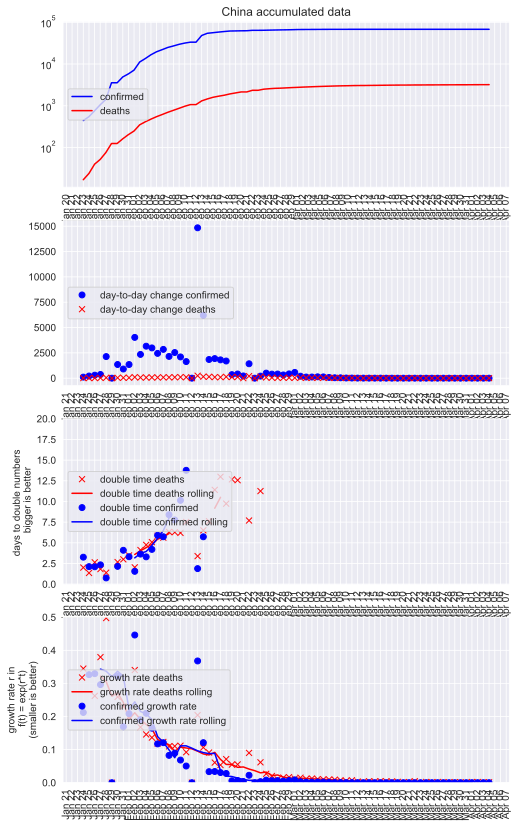

In [9]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129ff0610>,
      dtype=object)

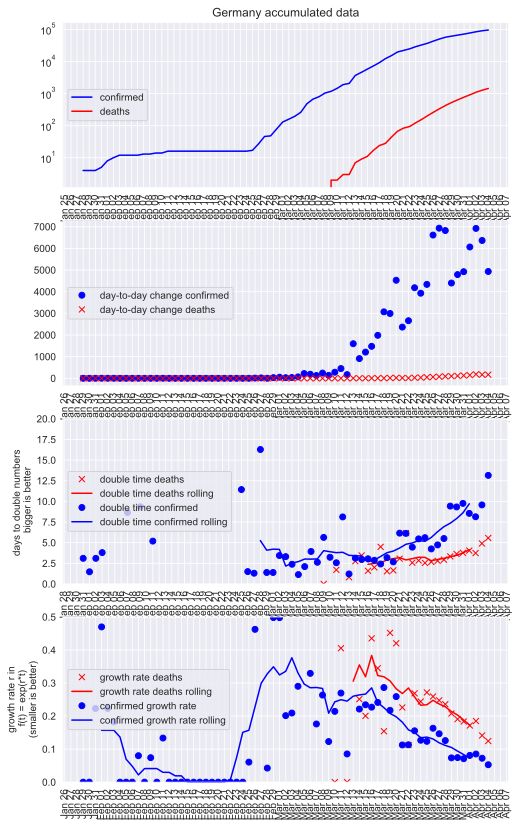

In [10]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b091b50>,
      dtype=object)

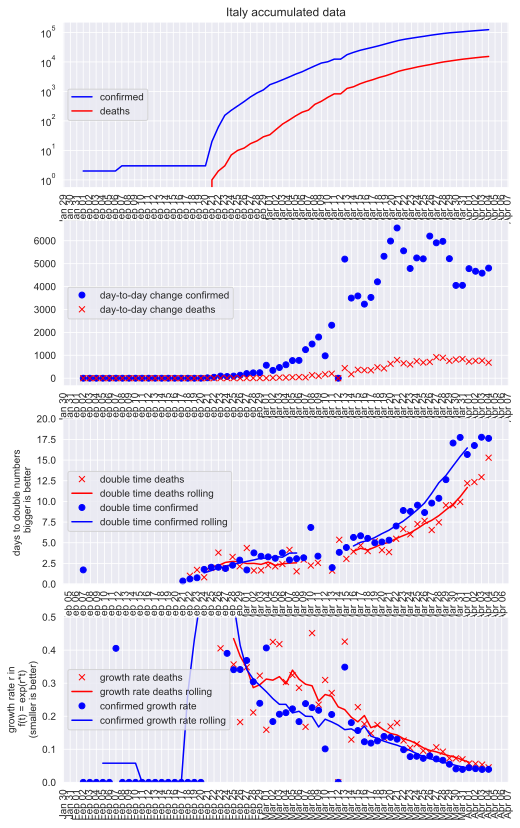

In [11]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ba0d050>,
      dtype=object)

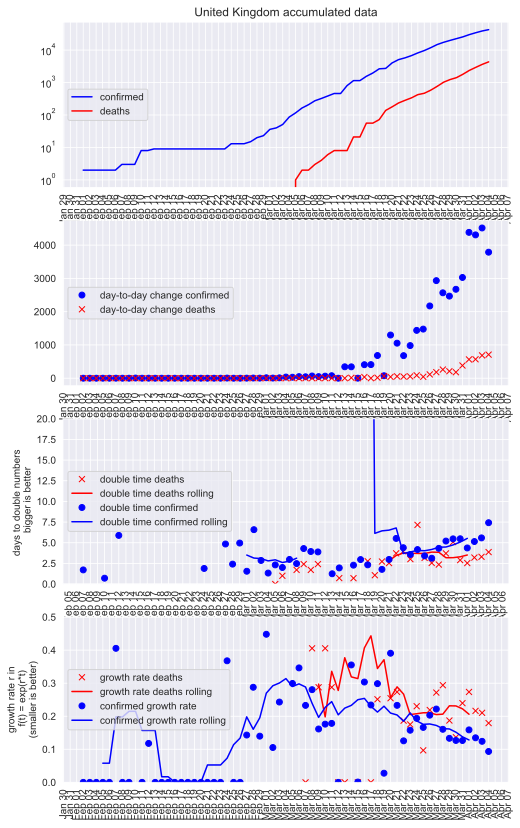

In [12]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bfd4f90>,
      dtype=object)

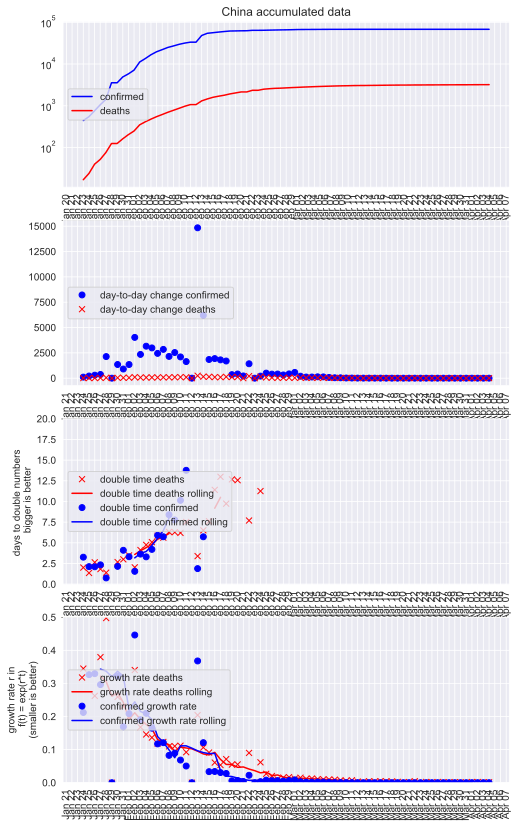

In [13]:
c = stack_country('China')
overview_plot(c)

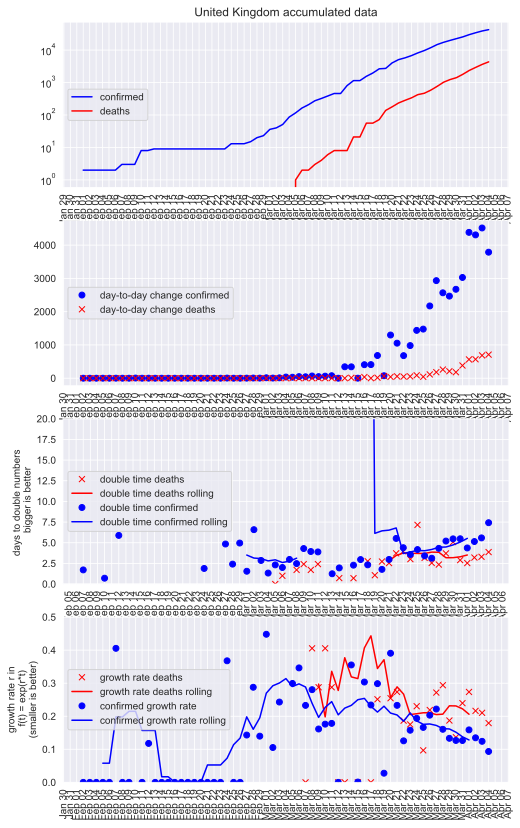

In [14]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [15]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.015251492616010198
r   : 0.091
t0  : -3.15
a0  : 2.46



------------------------------------------------------------------
| FCN = 0.01525                 |     Ncalls=107 (107 total)     |
| EDM = 6.89E-05 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.09    |   0.06    |            |            |         |         |       |
| 1 | t0   |   -3.2    |    24.7   |            |            |         |         |       |
| 2 | a0   |    2.5    |    5.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

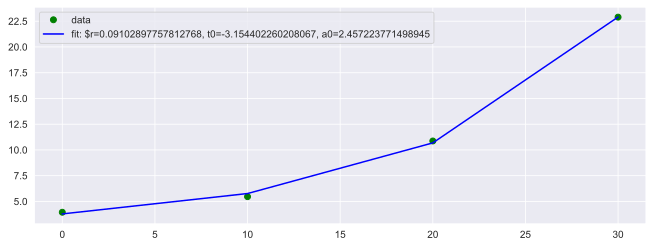

In [16]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 0.00680774039588393
r   : 0.365
t0  : 70
a0  : 6.78e+04

Double time: 1.9 days


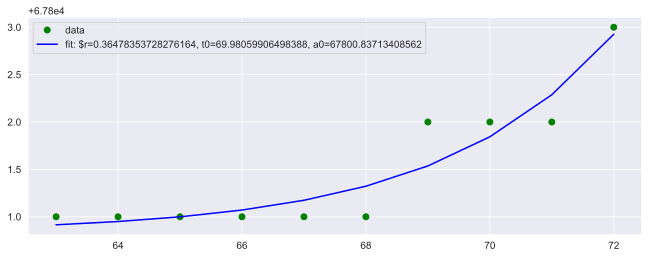

In [17]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 0.13374023595691872
r   : 0.0362
t0  : -63.3
a0  : 3.07e+03

Double time: 19.1 days


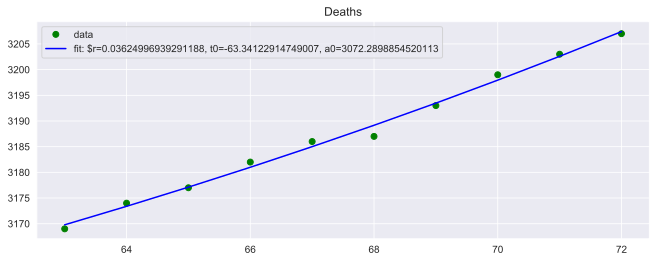

In [18]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [19]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 48464.17343045467
r   : 0.0234
t0  : -501
a0  : -1.16e+05

r=0.023378051399801487, t0=-501.23482543478264, a0=-115938.04051454022
Working on 1 to 8, this is 1/20
reduced chi^2: 37974.21646734588
r   : 0.0187
t0  : -640
a0  : -1.55e+05

r=0.01872489213020605, t0=-640.4836649463995, a0=-155328.65806398378
Working on 2 to 9, this is 2/20
reduced chi^2: 42396.20253479829
r   : 0.0266
t0  : -437
a0  : -1.05e+05

r=0.02659609188360902, t0=-436.79457451862635, a0=-104559.4682025176
Working on 3 to 10, this is 3/20
reduced chi^2: 41959.28783222546
r   : 0.0703
t0  : -148
a0  : -2.46e+04

r=0.07028601115105383, t0=-147.96089641064563, a0=-24626.629547210174
Working on 4 to 11, this is 4/20
reduced chi^2: 13526.268401879188
r   : 0.179
t0  : -48.7
a0  : 7.36e+03

r=0.17876393326025763, t0=-48.74966194246089, a0=7356.744653120251
Working on 5 to 12, this is 5/20
reduced chi^2: 13430.119226842426
r   : 0.177
t0  : -49.5
a0  : 

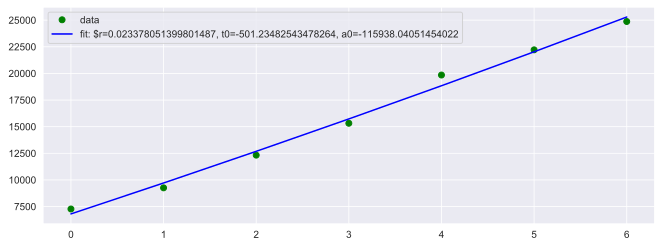

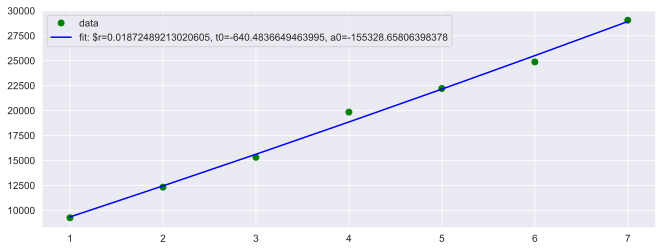

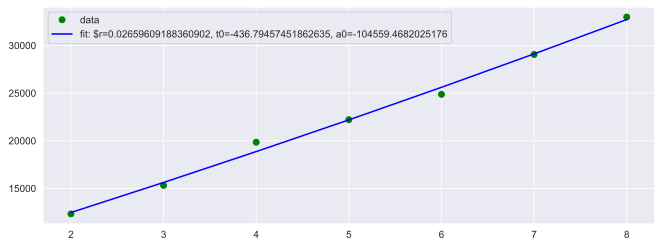

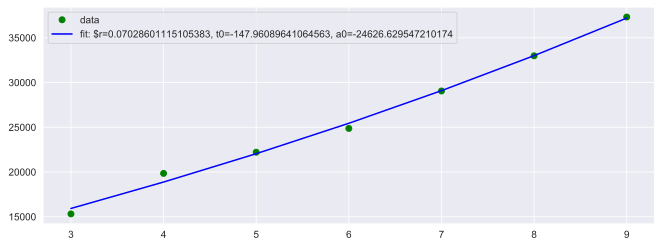

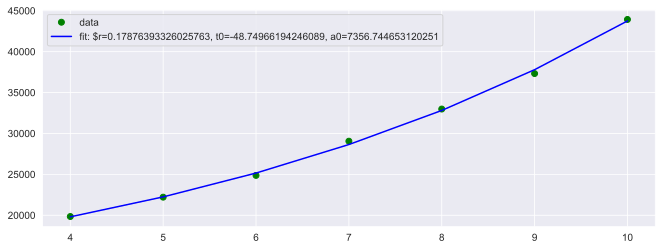

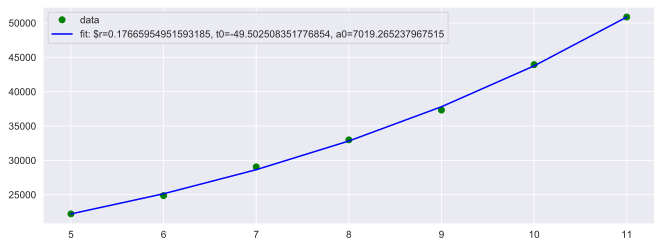

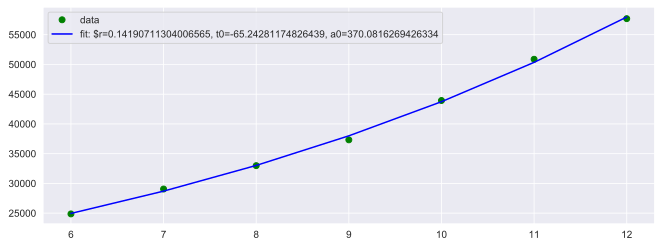

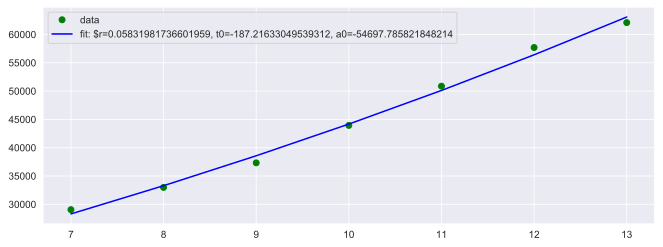

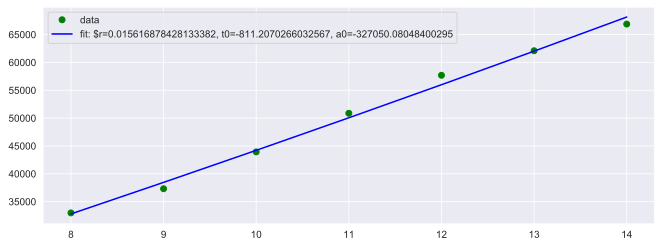

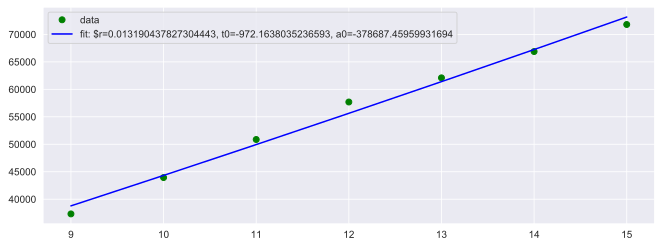

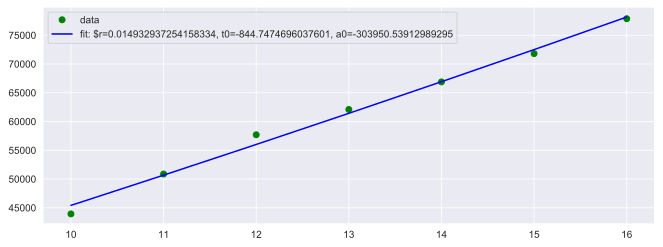

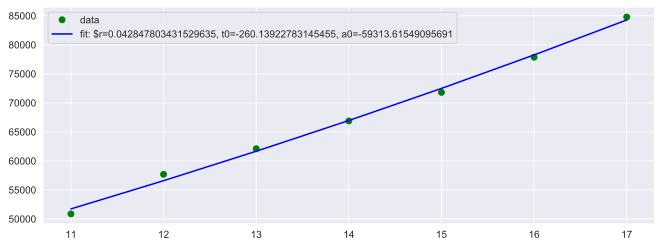

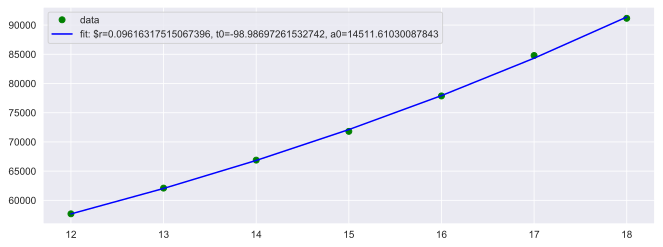

In [20]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 32160.63928177583
r   : 0.0998
t0  : -106
a0  : -1.15e+04

r=0.09978286752092874, t0=-105.95996890945673, a0=-11472.217381755112
Working on 1 to 8, this is 1/20
reduced chi^2: 54484.87702272677
r   : 0.0239
t0  : -514
a0  : -1.87e+05

r=0.023872953634412504, t0=-513.9023251312832, a0=-187035.53127763566
Working on 2 to 9, this is 2/20
reduced chi^2: 65572.0693303315
r   : 0.016
t0  : -792
a0  : -3e+05

r=0.016031795689808157, t0=-791.6722621302083, a0=-299639.8064473165
Working on 3 to 10, this is 3/20
reduced chi^2: 81981.82206339318
r   : 0.0149
t0  : -853
a0  : -3.11e+05

r=0.014932245187615564, t0=-852.5485369286123, a0=-311404.0171054624
Working on 4 to 11, this is 4/20
reduced chi^2: 45662.793291962385
r   : 0.0184
t0  : -676
a0  : -2.31e+05

r=0.018431264839932737, t0=-676.3232683904515, a0=-231167.06947840273
Working on 5 to 12, this is 5/20
reduced chi^2: 8603.240736386495
r   : 0.039
t0  : -296
a0  : -7e+

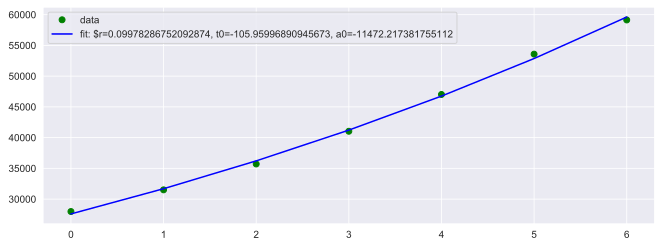

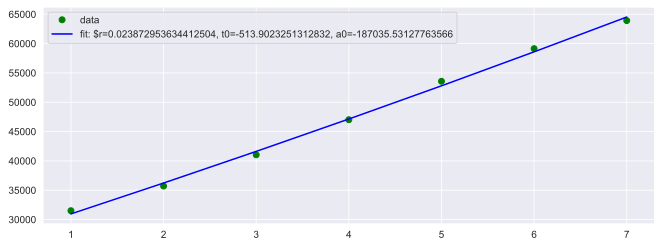

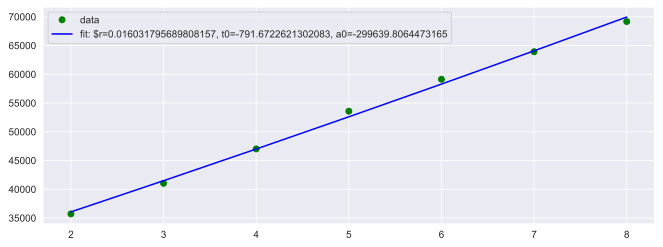

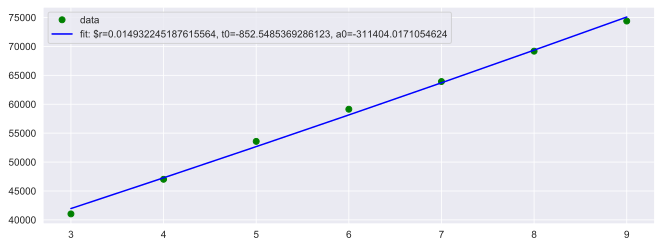

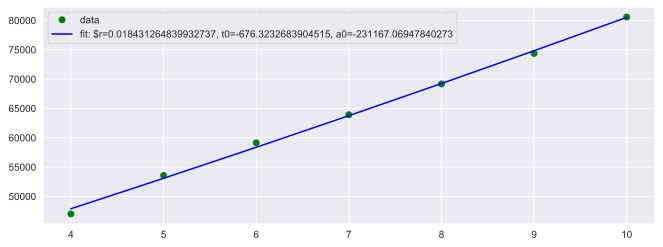

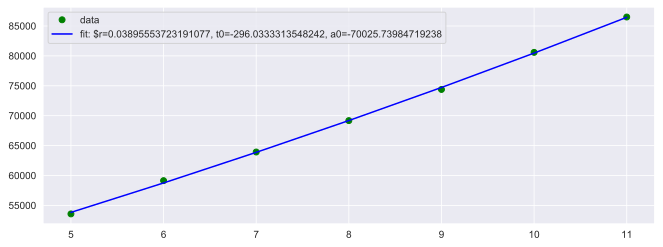

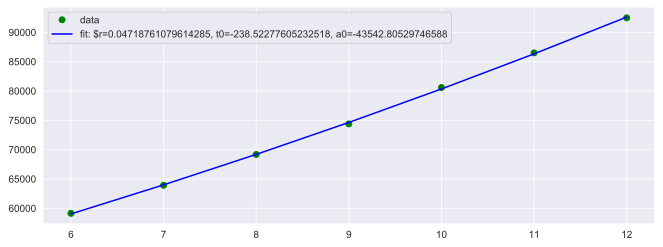

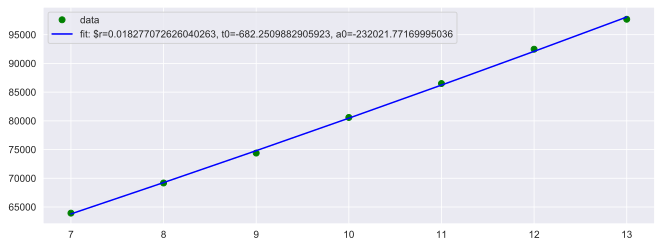

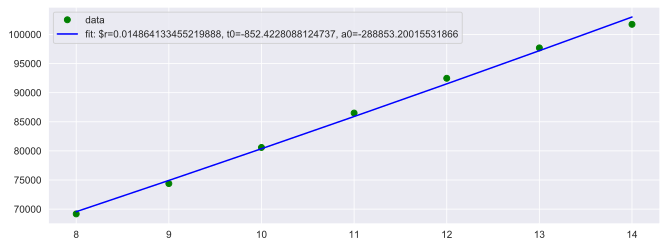

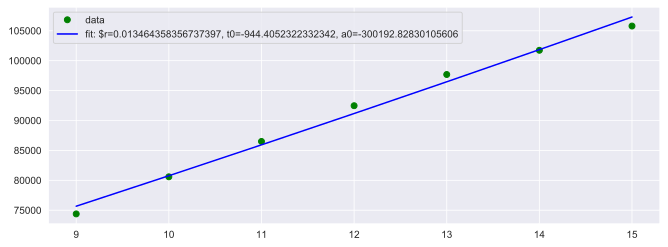

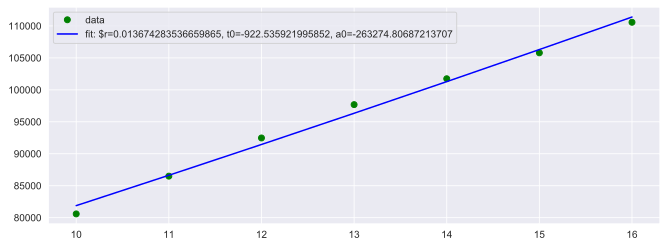

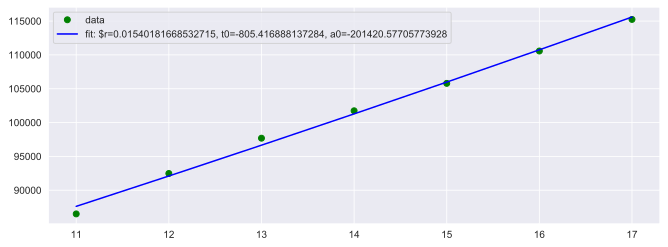

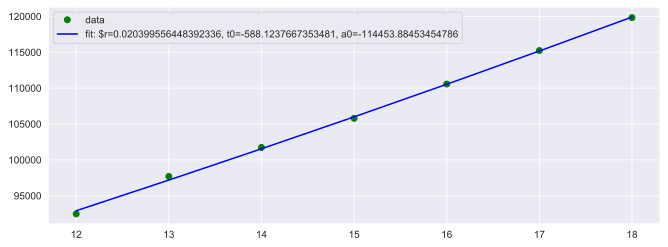

In [21]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 96021.81311916899
r   : 0.254
t0  : -35.4
a0  : -4.27e+03

r=0.2544486662900764, t0=-35.433381686059114, a0=-4271.68315860626
Working on 1 to 8, this is 1/20
reduced chi^2: 66719.81608452753
r   : 0.218
t0  : -42.8
a0  : -8.4e+03

r=0.21827640845996052, t0=-42.76613916525122, a0=-8404.131260869097
Working on 2 to 9, this is 2/20
reduced chi^2: 35099.285537364616
r   : 0.154
t0  : -64.8
a0  : -2.2e+04

r=0.15430023116789662, t0=-64.83222432659367, a0=-21995.043947033526
Working on 3 to 10, this is 3/20
reduced chi^2: 35968.60756856698
r   : 0.151
t0  : -66.3
a0  : -2.23e+04

r=0.15122403867848253, t0=-66.31056806466165, a0=-22297.063948837
Working on 4 to 11, this is 4/20
reduced chi^2: 94357.86045435382
r   : 0.183
t0  : -52.8
a0  : -1.28e+04

r=0.18271980227900436, t0=-52.78651724423622, a0=-12843.242251857391
Working on 5 to 12, this is 5/20
reduced chi^2: 97106.6342982468
r   : 0.178
t0  : -54.5
a0  : -1.42e+04


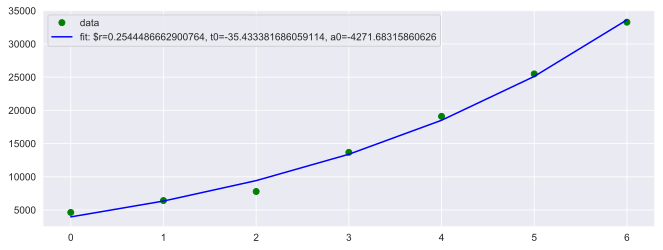

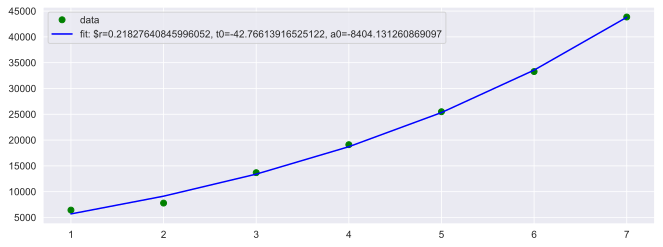

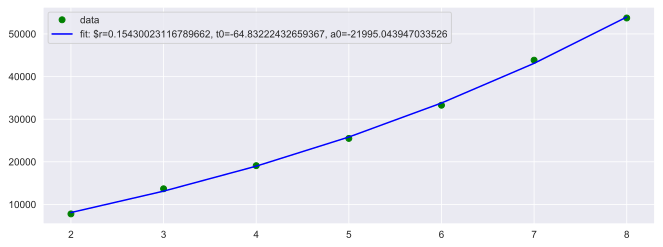

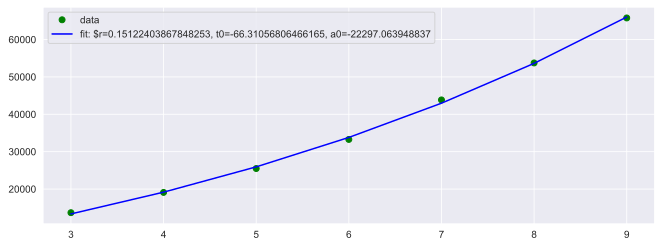

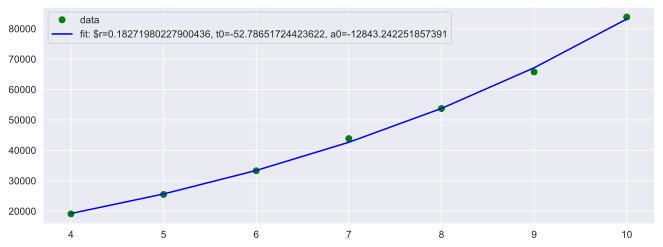

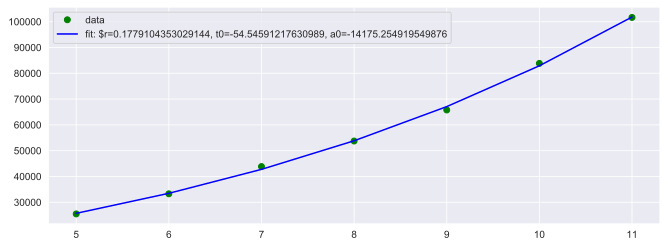

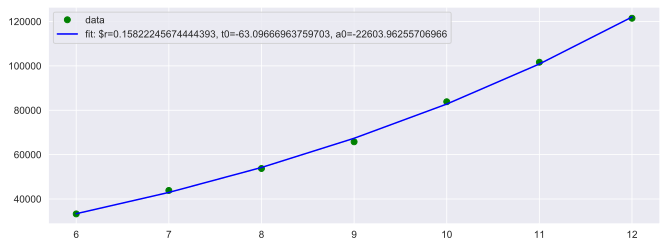

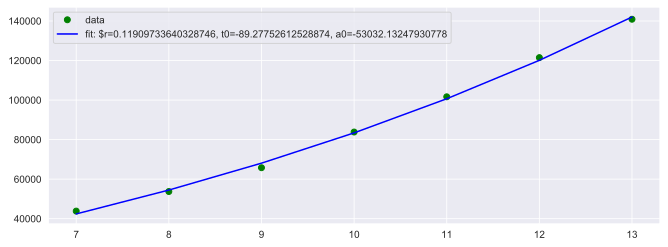

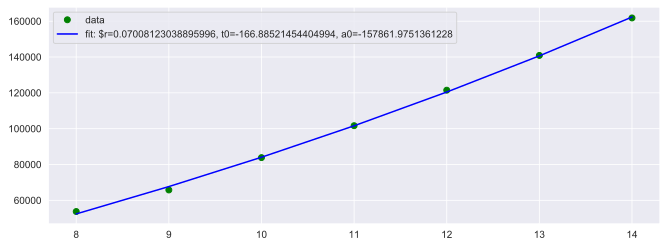

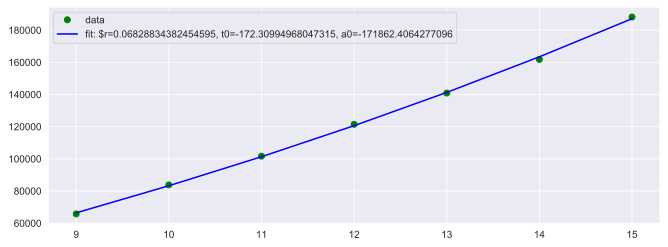

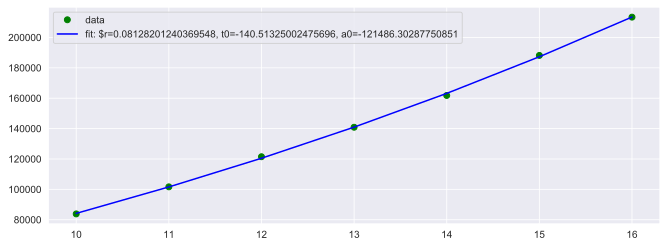

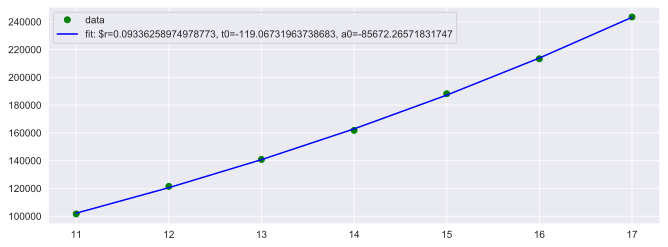

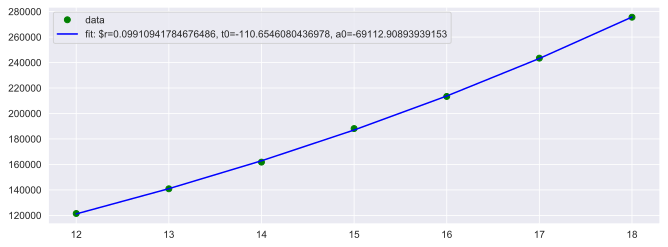

In [22]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 36834.56916270952
r   : 0.133
t0  : -72.9
a0  : -6.34e+03

r=0.13273580031373894, t0=-72.91879145000532, a0=-6337.79633288085
Working on 1 to 8, this is 1/20
reduced chi^2: 40258.264313325046
r   : 0.145
t0  : -65.9
a0  : -4.92e+03

r=0.1453584983628082, t0=-65.86128688312895, a0=-4916.59649251943
Working on 2 to 9, this is 2/20
reduced chi^2: 45736.77418600411
r   : 0.111
t0  : -90.3
a0  : -1.34e+04

r=0.11078044238575836, t0=-90.27124281371142, a0=-13364.641427379272
Working on 3 to 10, this is 3/20
reduced chi^2: 74348.67850191653
r   : 0.198
t0  : -45.2
a0  : 4.29e+03

r=0.19776051552569385, t0=-45.15247609260833, a0=4293.860620664382
Working on 4 to 11, this is 4/20
reduced chi^2: 78575.27115773554
r   : 0.177
t0  : -51.8
a0  : 1.21e+03

r=0.17704960138290549, t0=-51.82599198674227, a0=1206.072273305137
Working on 5 to 12, this is 5/20
reduced chi^2: 131691.3075339203
r   : 0.138
t0  : -70.2
a0  : -7.7e+03

r=

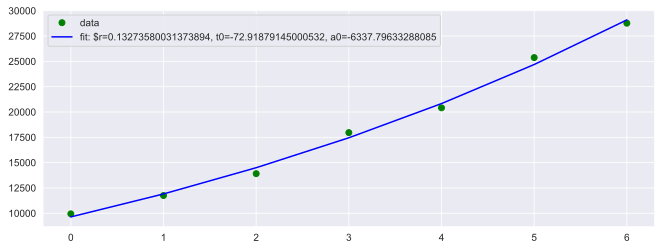

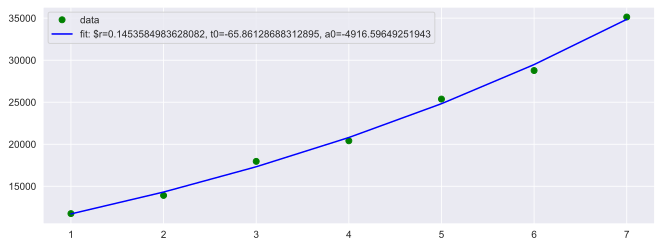

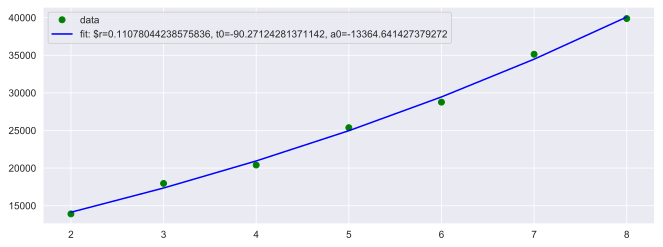

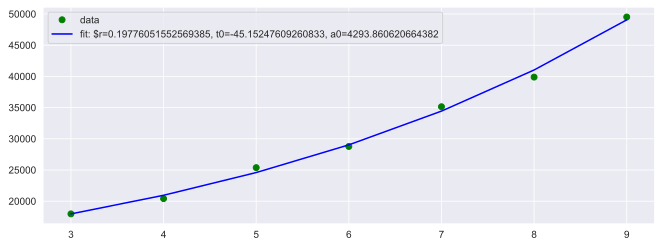

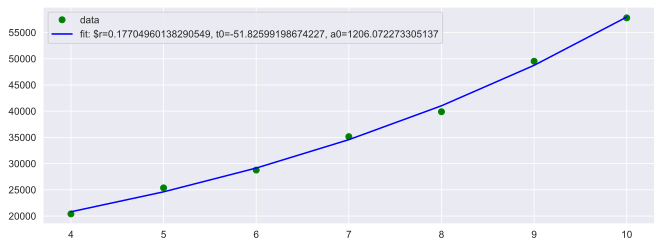

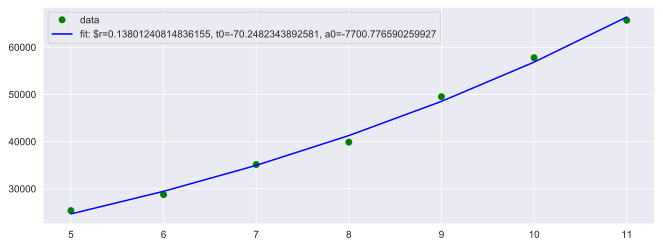

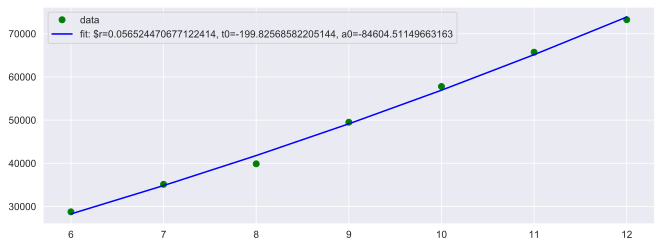

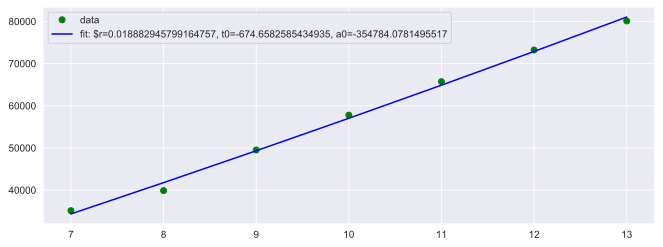

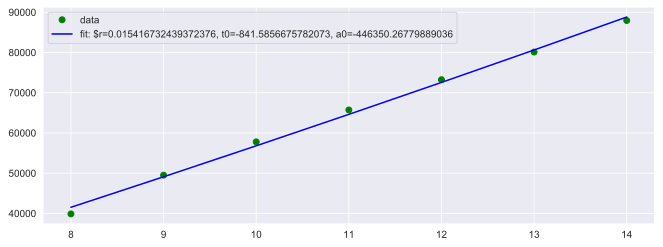

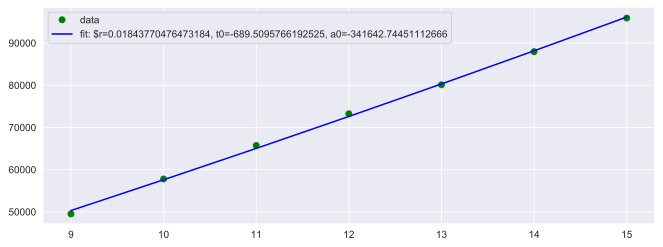

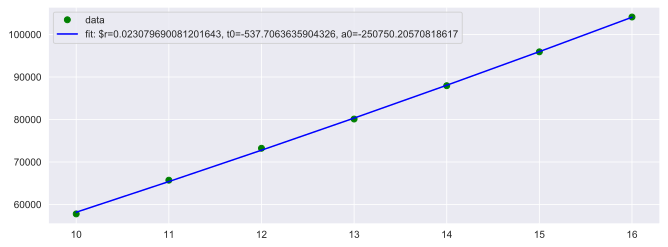

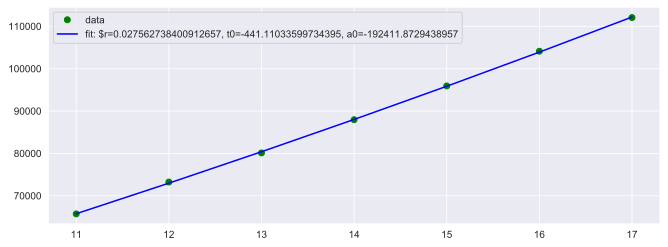

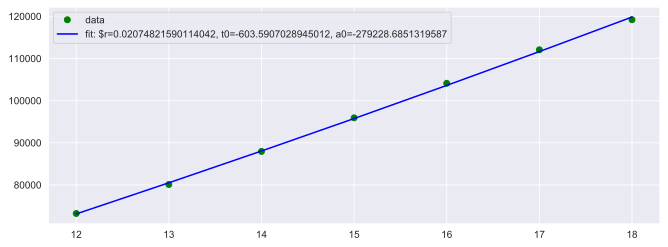

In [23]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 0.038326747536149355
r   : 0.0363
t0  : -52.7
a0  : 6.78e+04

r=0.03634158787992737, t0=-52.74911035753576, a0=67791.96191911494
Working on 1 to 8, this is 1/20
reduced chi^2: 0.014185128921613893
r   : 0.0596
t0  : -4.24
a0  : 6.78e+04

r=0.05962586820122722, t0=-4.243181080796605, a0=67798.20662262046
Working on 2 to 9, this is 2/20
reduced chi^2: 2.801392273503407e-05
r   : 3.35
t0  : 8
a0  : 6.78e+04

r=3.3524628888585406, t0=8.000904820748968, a0=67799.99261557491
Working on 3 to 10, this is 3/20
reduced chi^2: 0.00712775070399743
r   : 0.535
t0  : 8.58
a0  : 6.78e+04

r=0.5346723872775283, t0=8.582045033295397, a0=67799.86113124424
Working on 4 to 11, this is 4/20
reduced chi^2: 0.00993408809063461
r   : 0.181
t0  : 6.27
a0  : 6.78e+04

r=0.18092223382296438, t0=6.272899908035806, a0=67799.20977418419
Working on 5 to 12, this is 5/20
reduced chi^2: 0.011801839404394979
r   : 0.0807
t0  : -3.63
a0  : 6.78e+04


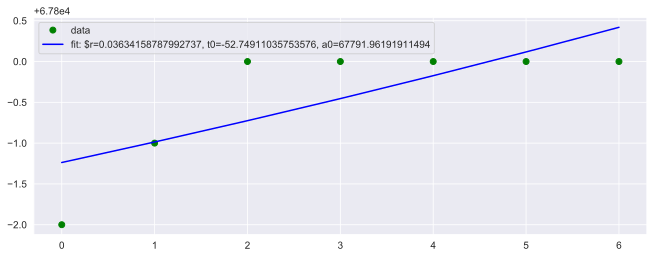

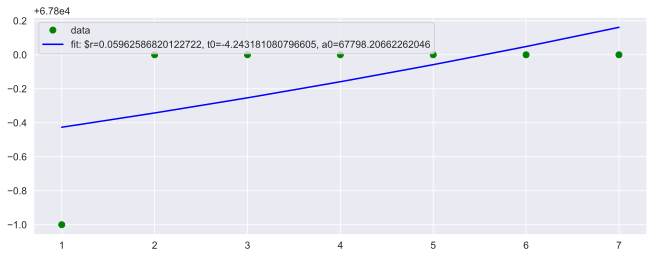

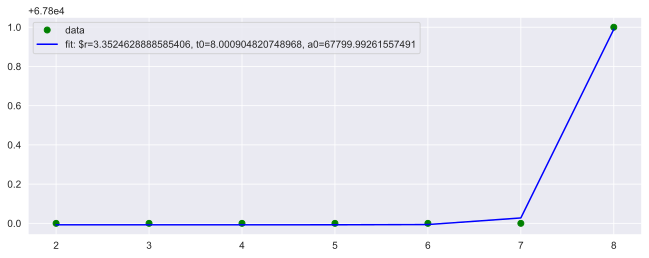

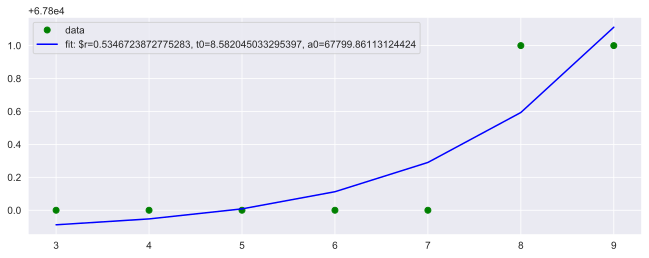

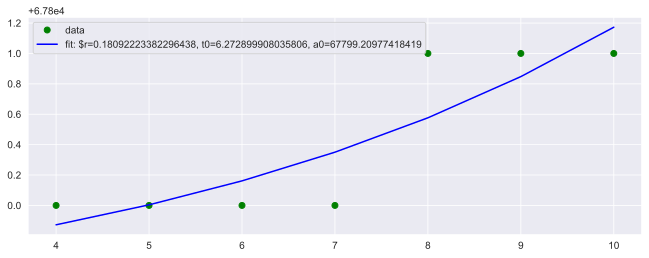

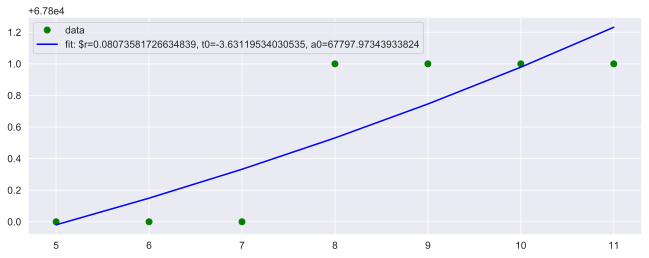

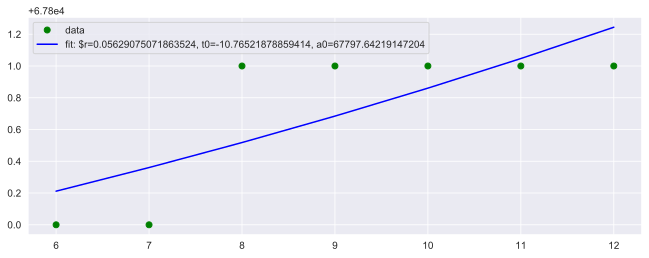

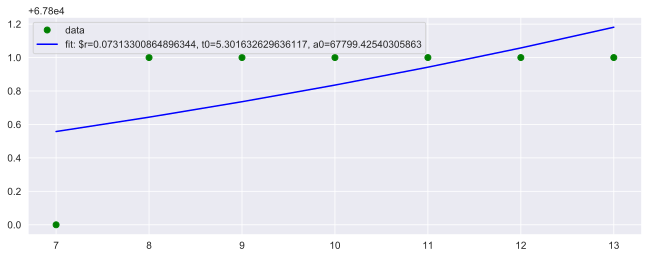

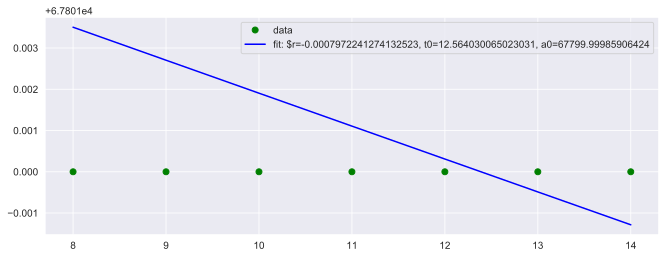

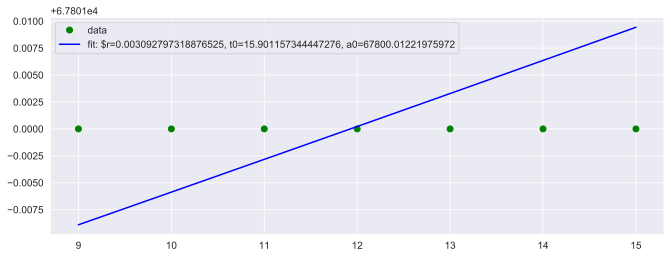

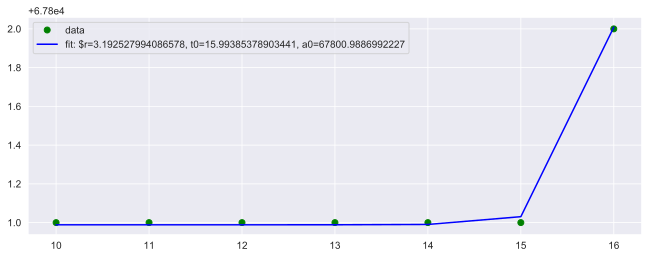

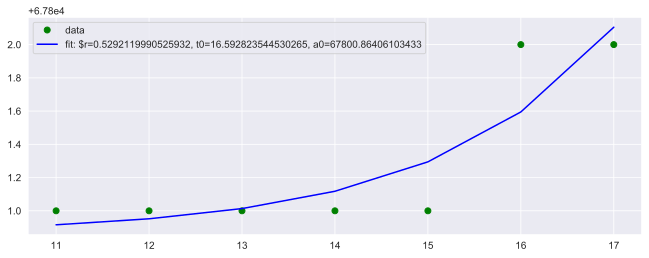

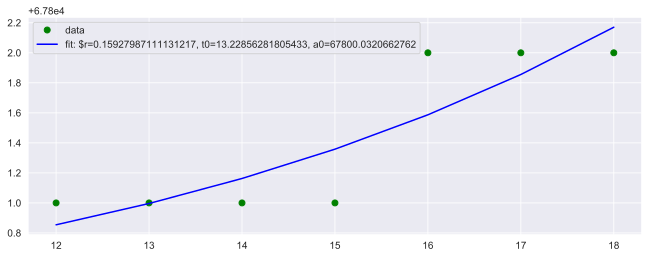

In [24]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [25]:
p_confirmed.tail(n=10)

r       t0       a0 chi2
2020-03-26     0.534672  8.58205  67799.9  NaN
2020-03-27     0.180922   6.2729  67799.2  NaN
2020-03-28    0.0807358  -3.6312    67798  NaN
2020-03-29    0.0562908 -10.7652  67797.6  NaN
2020-03-30     0.073133  5.30163  67799.4  NaN
2020-03-31 -0.000797224   12.564    67800  NaN
2020-04-01    0.0030928  15.9012    67800  NaN
2020-04-02      3.19253  15.9939    67801  NaN
2020-04-03     0.529212  16.5928  67800.9  NaN
2020-04-04      0.15928  13.2286    67800  NaN

In [26]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [27]:
p_confirmed.tail(n=10)

r       t0       a0 chi2 double_time
2020-03-26     0.534672  8.58205  67799.9  NaN      1.2964
2020-03-27     0.180922   6.2729  67799.2  NaN     3.83119
2020-03-28    0.0807358  -3.6312    67798  NaN     8.58537
2020-03-29    0.0562908 -10.7652  67797.6  NaN     12.3137
2020-03-30     0.073133  5.30163  67799.4  NaN      9.4779
2020-03-31 -0.000797224   12.564    67800  NaN    -869.451
2020-04-01    0.0030928  15.9012    67800  NaN     224.117
2020-04-02      3.19253  15.9939    67801  NaN    0.217115
2020-04-03     0.529212  16.5928  67800.9  NaN     1.30977
2020-04-04      0.15928  13.2286    67800  NaN     4.35176

Log basics ...

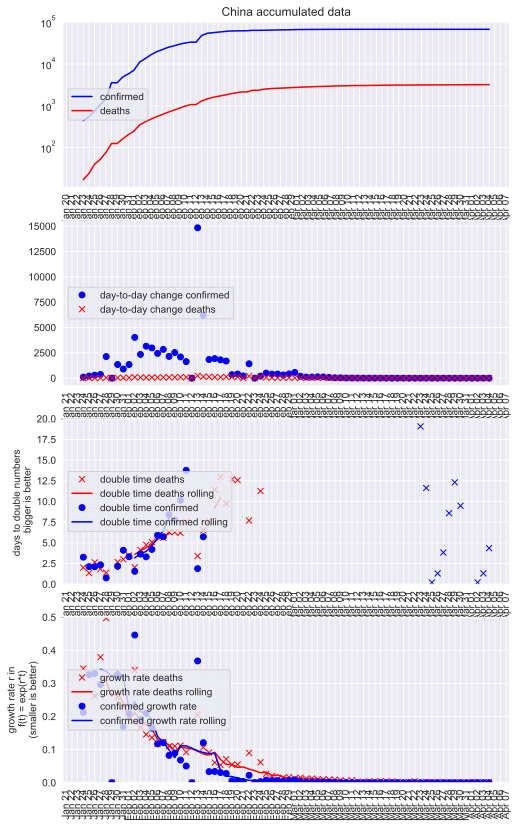

In [28]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


In [29]:
from math import log 
log(2)/log(0.5)

-1.0

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [30]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

(1.0, 0.6931471805599453)

In [31]:
2**(1/double_time_exponential2(0, 1, 1, 21))

21.000000000000007

In [32]:
2/math.exp(1)

0.7357588823428847

In [33]:
math.exp(0.5)/2

0.8243606353500641

In [34]:
math.exp(0.6931471805599453*4)

15.999999999999998

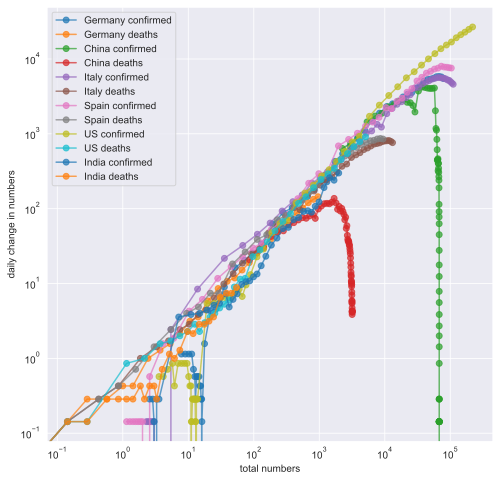

In [35]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [36]:
c

confirmed deaths days-td  days new_confirmed new_deaths  \
2020-01-31         1      0  0 days   0.0           NaN        NaN   
2020-02-01         1      0  1 days   1.0             0          0   
2020-02-02         2      0  2 days   2.0             1          0   
2020-02-03         3      0  3 days   3.0             1          0   
2020-02-04         3      0  4 days   4.0             0          0   
...              ...    ...     ...   ...           ...        ...   
2020-03-31      1397     35 60 days  60.0           146          3   
2020-04-01      1998     58 61 days  61.0           601         23   
2020-04-02      2543     72 62 days  62.0           545         14   
2020-04-03      2567     72 63 days  63.0            24          0   
2020-04-04      3082     86 64 days  64.0           515         14   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-31            NaN         NaN                 NaN   
2020-02-01       1.000000         NaN                 NaN   
2020-02-02       2.000000         NaN                 NaN   
2020-02-03       1.500000         NaN                 NaN   
2020-02-04       1.000000         NaN                 NaN   
...                   ...         ...                 ...   
2020-03-31       1.116707    1.093750            7.734968   
2020-04-01       1.430208    1.657143            1.372311   
2020-04-02       1.272773    1.241379            3.205704   
2020-04-03       1.009438    1.000000                 inf   
2020-04-04       1.200623    1.194444            3.901073   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-31                    NaN                 NaN                    NaN  
2020-02-01                    inf                 NaN               0.000000  
2020-02-02               1.000000                 NaN               0.693147  
2020-02-03               1.709511                 NaN               0.405465  
2020-02-04                    inf                 NaN               0.000000  
...                           ...                 ...                    ...  
2020-03-31               6.279426            0.089612               0.110384  
2020-04-01               1.937141            0.505095               0.357820  
2020-04-02               2.873771            0.216223               0.241198  
2020-04-03              73.790751            0.000000               0.009393  
2020-04-04               3.790987            0.177681               0.182841  

[65 rows x 12 columns]

In [37]:
confirmed.loc['Germany']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-03-31 00:00:00    71808
2020-04-01 00:00:00    77872
2020-04-02 00:00:00    84794
2020-04-03 00:00:00    91159
2020-04-04 00:00:00    96092
Name: Germany, Length: 75, dtype: object

In [38]:
deaths.loc['Germany']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-03-31 00:00:00     775
2020-04-01 00:00:00     920
2020-04-02 00:00:00    1107
2020-04-03 00:00:00    1275
2020-04-04 00:00:00    1444
Name: Germany, Length: 75, dtype: object

In [39]:
confirmed.loc['US']

Province/State            NaN
2020-01-22 00:00:00         1
2020-01-23 00:00:00         1
2020-01-24 00:00:00         2
2020-01-25 00:00:00         2
                        ...  
2020-03-31 00:00:00    188172
2020-04-01 00:00:00    213372
2020-04-02 00:00:00    243453
2020-04-03 00:00:00    275586
2020-04-04 00:00:00    308850
Name: US, Length: 75, dtype: object

In [40]:
deaths.loc['US']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-03-31 00:00:00    3873
2020-04-01 00:00:00    4757
2020-04-02 00:00:00    5926
2020-04-03 00:00:00    7087
2020-04-04 00:00:00    8407
Name: US, Length: 75, dtype: object

In [41]:
confirmed.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    1                    9   
China                  Beijing                   14                   22   
China                Chongqing                    6                    9   
China                   Fujian                    1                    5   
China                    Gansu                    0                    2   
China                Guangdong                   26                   32   
China                  Guangxi                    2                    5   
China                  Guizhou                    1                    3   
China                   Hainan                    4                    5   
China                    Hebei                    1                    1   
China             Heilongjiang                    0                    2   
China                    Henan                    5                    5   
China                Hong Kong                    0                    2   
China                    Hubei                  444                  444   
China                    Hunan                    4                    9   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    1                    5   
China                  Jiangxi                    2                    7   
China                    Jilin                    0                    1   
China                 Liaoning                    2                    3   
China                    Macau                    1                    2   
China                  Ningxia                    1                    1   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    3   
China                 Shandong                    2                    6   
China                 Shanghai                    9                   16   
China                   Shanxi                    1                    1   
China                  Sichuan                    5                    8   
China                  Tianjin                    4                    4   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    2   
China                   Yunnan                    1                    2   
China                 Zhejiang                   10                   27   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                            15                   39                   60   
China                            36                   41                   68   
China                            27                   57                   75   
China                            10                   18                   35   
China                             2                    4                    7   
China                            53                   78                  111   
China                            23                   23                   36   
China                             3                    4                    5   
China                             8                   19                   22   
China                             2                    8                   13   
China                             4                    9                   15   
China                             9                   32                   83   
China                             2                    5                    8   
China                           549                  761                 1058   
China                            24                   43   

In [42]:
deaths.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    0                    0   
China                  Beijing                    0                    0   
China                Chongqing                    0                    0   
China                   Fujian                    0                    0   
China                    Gansu                    0                    0   
China                Guangdong                    0                    0   
China                  Guangxi                    0                    0   
China                  Guizhou                    0                    0   
China                   Hainan                    0                    0   
China                    Hebei                    0                    1   
China             Heilongjiang                    0                    0   
China                    Henan                    0                    0   
China                Hong Kong                    0                    0   
China                    Hubei                   17                   17   
China                    Hunan                    0                    0   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    0                    0   
China                  Jiangxi                    0                    0   
China                    Jilin                    0                    0   
China                 Liaoning                    0                    0   
China                    Macau                    0                    0   
China                  Ningxia                    0                    0   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    0   
China                 Shandong                    0                    0   
China                 Shanghai                    0                    0   
China                   Shanxi                    0                    0   
China                  Sichuan                    0                    0   
China                  Tianjin                    0                    0   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    0   
China                   Yunnan                    0                    0   
China                 Zhejiang                    0                    0   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             1                    1                    1   
China                             1                    1                    1   
China                             0                    0                    1   
China                             0                    0                    0   
China                            24                   40                   52   
China                             0                    0   

In [43]:
confirmed.loc['Italy']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-03-31 00:00:00    105792
2020-04-01 00:00:00    110574
2020-04-02 00:00:00    115242
2020-04-03 00:00:00    119827
2020-04-04 00:00:00    124632
Name: Italy, Length: 75, dtype: object

In [44]:
deaths.loc['Italy']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-03-31 00:00:00    12428
2020-04-01 00:00:00    13155
2020-04-02 00:00:00    13915
2020-04-03 00:00:00    14681
2020-04-04 00:00:00    15362
Name: Italy, Length: 75, dtype: object

In [45]:
confirmed.loc['Spain']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-03-31 00:00:00     95923
2020-04-01 00:00:00    104118
2020-04-02 00:00:00    112065
2020-04-03 00:00:00    119199
2020-04-04 00:00:00    126168
Name: Spain, Length: 75, dtype: object

In [46]:
deaths.loc['Spain']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-03-31 00:00:00     8464
2020-04-01 00:00:00     9387
2020-04-02 00:00:00    10348
2020-04-03 00:00:00    11198
2020-04-04 00:00:00    11947
Name: Spain, Length: 75, dtype: object

In [47]:
confirmed.loc['India']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-03-31 00:00:00    1397
2020-04-01 00:00:00    1998
2020-04-02 00:00:00    2543
2020-04-03 00:00:00    2567
2020-04-04 00:00:00    3082
Name: India, Length: 75, dtype: object

In [48]:
deaths.loc['India']

Province/State         NaN
2020-01-22 00:00:00      0
2020-01-23 00:00:00      0
2020-01-24 00:00:00      0
2020-01-25 00:00:00      0
                      ... 
2020-03-31 00:00:00     35
2020-04-01 00:00:00     58
2020-04-02 00:00:00     72
2020-04-03 00:00:00     72
2020-04-04 00:00:00     86
Name: India, Length: 75, dtype: object